In [21]:
import sys
import pandas as pd
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
import ternary
import numpy as np
import matplotlib.pyplot as plt
import platform

In [22]:

if platform.system() == 'Darwin':
    MCNT = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_NT.csv")
    MCVI = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_VI.csv")
    MCTF = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_TF.csv")
if platform.system() == 'Linux':
    MCNT = pd.read_csv("/home/vie/Documents/GitHub/evology/evology/data/MC_NT.csv")
    MCVI = pd.read_csv("/home/vie/Documents/GitHub/evology/evology/data/MC_VI.csv")
    MCTF = pd.read_csv("/home/vie/Documents/GitHub/evology/evology/data/MC_TF.csv")

We want to visualise a scatterplot of the wealth coordinates of the system after T days, from the same initial condition.

In [23]:
FinalCoordNT, FinalCoordVI, FinalCoordTF = [],[],[]

for i in range(len(MCNT.columns) - 1):
    value = MCNT['Rep%s' % i].iloc[-1]
    FinalCoordNT.append(value)
# print(FinalCoordNT)

for i in range(len(MCVI.columns) - 1):
    value = MCVI['Rep%s' % i].iloc[-1]
    FinalCoordVI.append(value)
# print(FinalCoordVI)

for i in range(len(MCTF.columns) - 1):
    value = MCTF['Rep%s' % i].iloc[-1]
    FinalCoordTF.append(value)
# print(FinalCoordTF)

print([np.mean(FinalCoordNT),np.mean(FinalCoordVI),np.mean(FinalCoordTF)])
print([np.std(FinalCoordNT),np.std(FinalCoordVI),np.std(FinalCoordTF)])

[58.4775004300511, 31.704996387653892, 9.817503182295008]
[32.28400359367695, 30.284417607601952, 14.291067894540058]


In [24]:
scale = 100
def random_points(num_points=30, scale=100):
    points = []
    for i in range(num_points):
        x = np.random.randint(1, scale)
        y = np.random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

points = random_points(30)

def FinalPoints(MCNT, MCVI, MCTF):
    points = []
    for i in range(len(MCNT.columns) - 1):
        x = MCNT['Rep%s' % i].iloc[-1]
        y = MCVI['Rep%s' % i].iloc[-1]
        z = MCTF['Rep%s' % i].iloc[-1]
        points.append((x,y,z))
    return points

def PathPoints(MCNT, MCVI, MCTF):
    points = []
    for i in range(len(MCNT.columns) - 1):
        x = MCNT['Rep%s' % i].mean()
        y = MCVI['Rep%s' % i].mean()
        z = MCTF['Rep%s' % i].mean()
        points.append((x,y,z))
    return points

Finalpoints = FinalPoints(MCNT, MCVI, MCTF)
Pathpoints = PathPoints(MCNT, MCVI, MCTF)



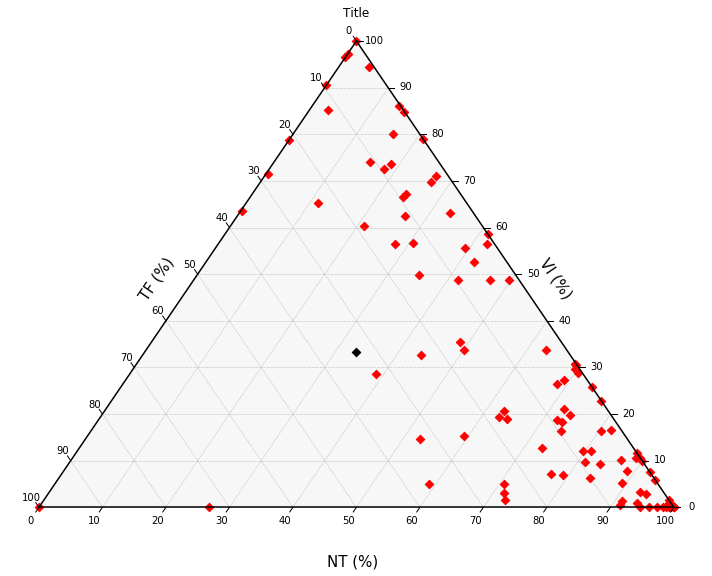

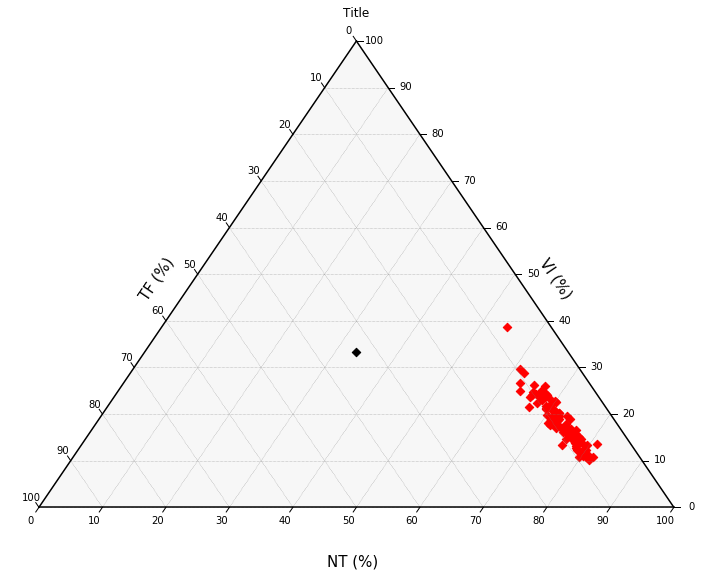

In [25]:
fontsize = 15

def TernaryPlot(scale, points, fontsize):
    origin = [((100/3, 100/3, 100/3))]
    # origin = [((40, 40, 20))]
    # origin = [((20,40,40))]
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(10, 8)
    tax.gridlines(color="gray", multiple=10)
    tax.boundary()
    tax.left_axis_label("TF (%)", fontsize = fontsize)
    tax.right_axis_label("VI (%)", fontsize = fontsize)
    tax.bottom_axis_label("NT (%)", fontsize = fontsize)
    tax.scatter(points, marker='D', color='red', label="Simulations")
    tax.scatter(origin, marker='D', color='black', label="Initial condition")
    ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1, multiple=10)
    tax.get_axes().axis('off')
    # tax.clear_matplotlib_ticks()
    tax.set_title('Title')
    plt.tight_layout()
    tax._redraw_labels()
    return figure, tax

figure, tax = TernaryPlot(scale, Finalpoints, fontsize)
if platform.system() == 'Linux':
    path = '/home/vie/Documents/GitHub/evology/evology/research/TransferStatus/MCarloLongRuns/FinalTernary.png'
    plt.savefig(path, dpi=300)
if platform.system() == 'Darwin':
    plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/research/TransferStatus/MCarloLongRuns/FinalTernary.png', dpi = 300)
tax.show()

figure, tax = TernaryPlot(scale, Pathpoints, fontsize)
if platform.system() == 'Linux':
    path = '/home/vie/Documents/GitHub/evology/evology/research/TransferStatus/MCarloLongRuns/PathTernary.png'
    plt.savefig(path, dpi=300)
if platform.system() == 'Darwin':
    plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/research/TransferStatus/MCarloLongRuns/PathTernary.png', dpi = 300)
tax.show()
